# Algerian Forest Fire

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [367]:
dataset = pd.read_csv("../Dataset/Algerian_forest_fires_dataset.csv",header=1)

In [368]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [369]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [370]:
## create new coloumn for region
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset

In [371]:
df[['Region']]=df[['Region']].astype(int)

In [372]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [373]:
df= df.dropna().reset_index(drop=True)

In [374]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [375]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [376]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
243,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [377]:
df=df.drop(122).reset_index(drop=True)


In [378]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [379]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [380]:
df.columns = df.columns.str.strip()

In [381]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [383]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [385]:
# To float values

objects = [features for features in df.columns if df[features].dtypes=='O']
# Our output is classes, we are doing categorical feature, so it should remain as object
for i in objects:
    if i!='Classes':
        df[i] = df[i].astype(float)

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [387]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fire','fire')
df_day_month_inc = df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


## EDA

In [388]:
# lets drop day,month,year as it is not a part in the classification
df = df.drop(['day','month','year'],axis=1)

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int32  
dtypes: float64(7), int32(4), object(1)
memory usage: 19.1+ KB


In [390]:
df[['Classes']].value_counts()

Classes 
fire        137
not fire    106
Name: count, dtype: int64

In [391]:
# Clean Different strings with or without spaces

df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [392]:
df[['Classes']].value_counts()

Classes
1          137
0          106
Name: count, dtype: int64

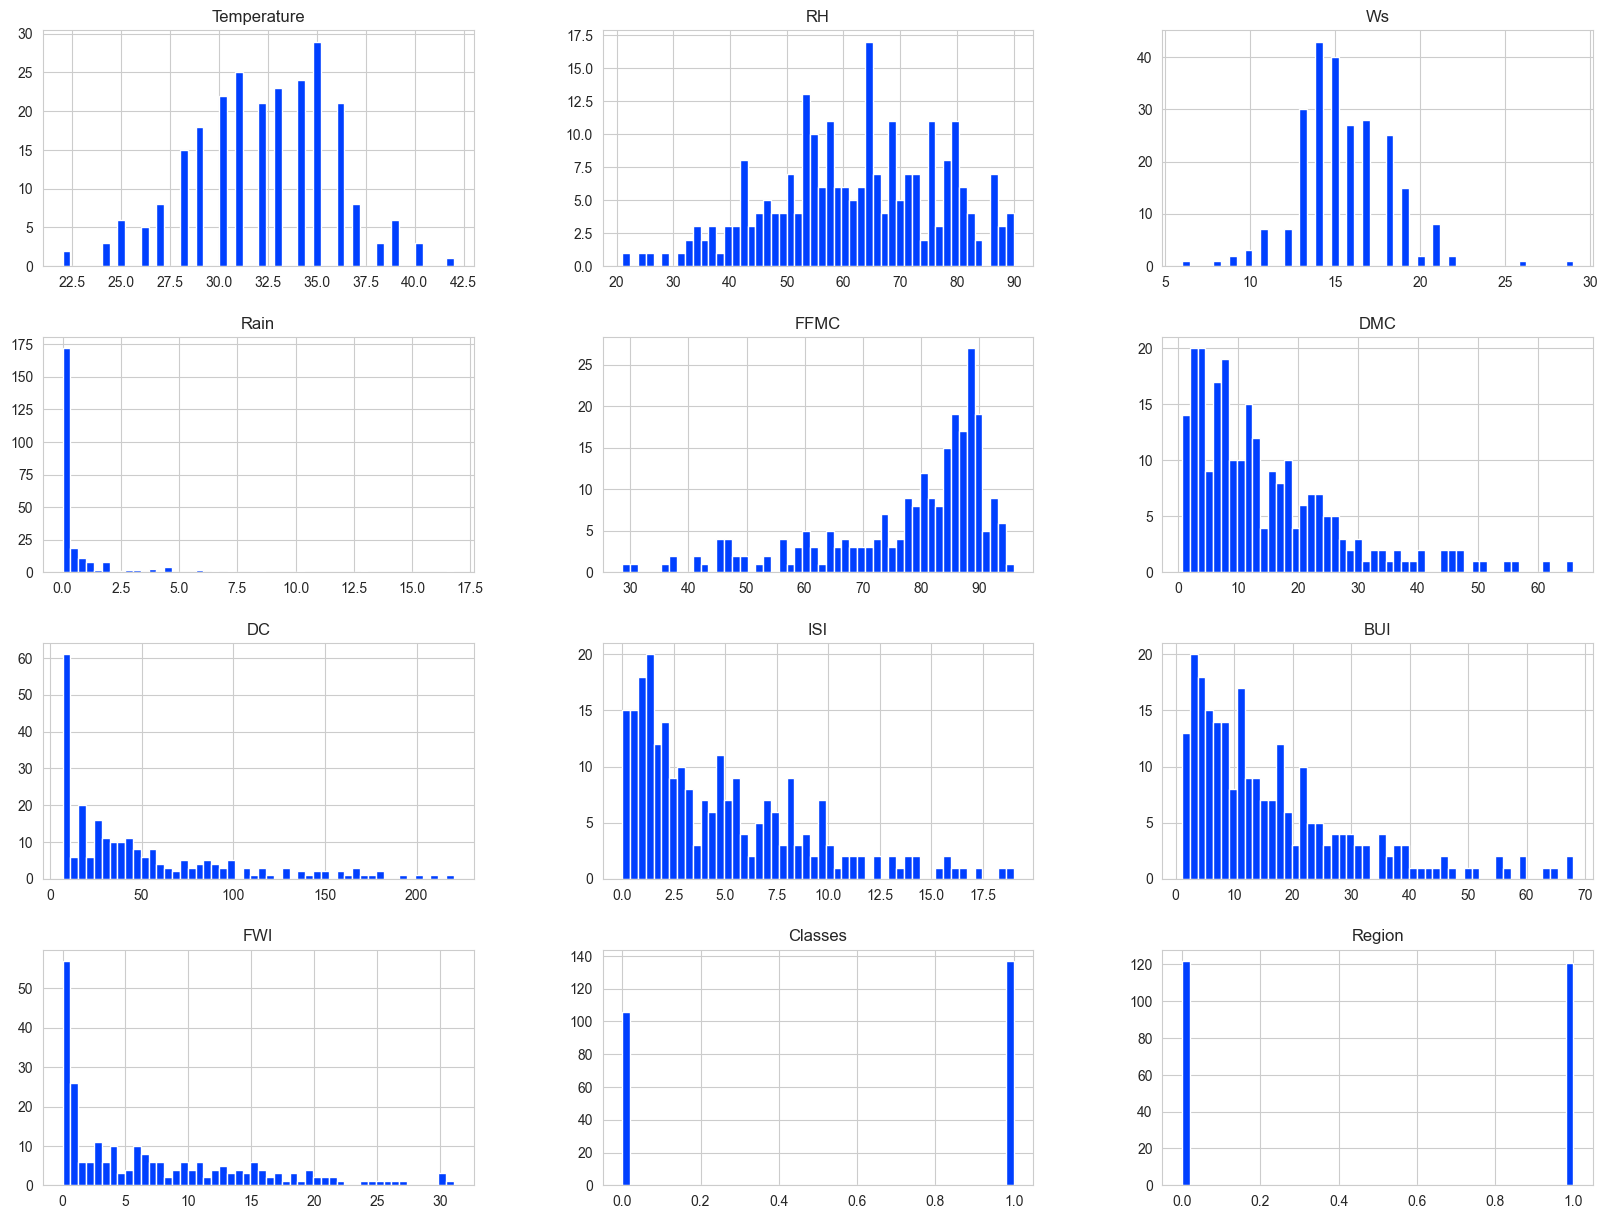

In [393]:
## Plot densit plot for all features
plt.style.use([i for i in plt.style.available if str(i).__contains__('seaborn')][1])
df.hist(bins=50,figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Pie chart of Classes')

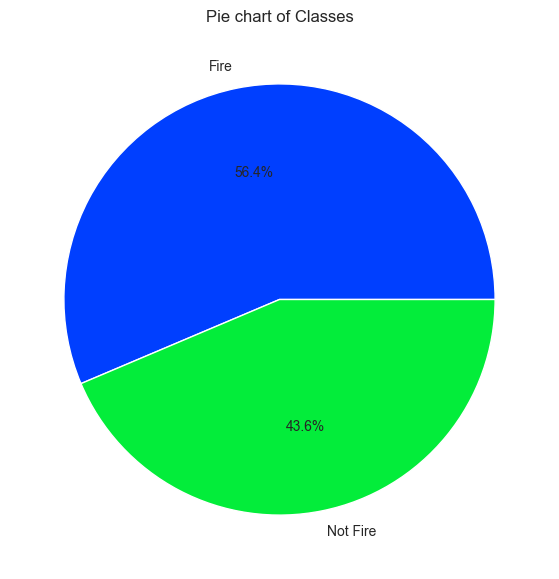

In [394]:
classes_percentage = df['Classes'].value_counts(normalize=True)*100
## ply chart
classlabels = ['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(classes_percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie chart of Classes")

<Axes: >

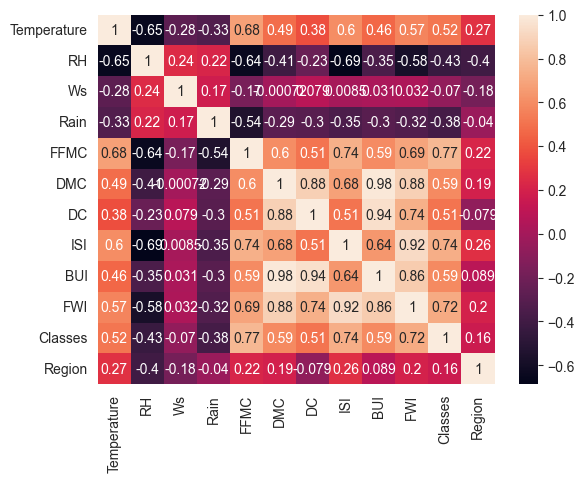

In [395]:
sns.heatmap(data=df.corr(),annot=True)

<Axes: ylabel='FWI'>

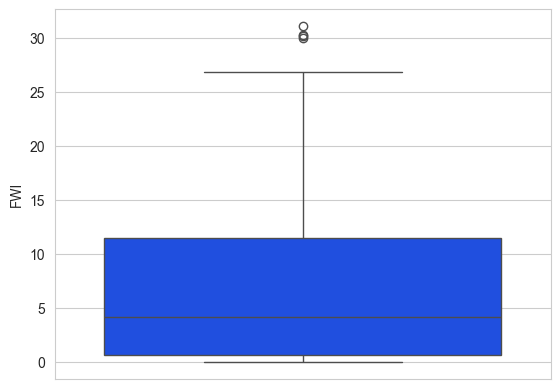

In [396]:
## box plots
sns.boxplot(df['FWI'])

In [397]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

Text(0.5, 1.0, 'Fire Analysis of Siddi Region')

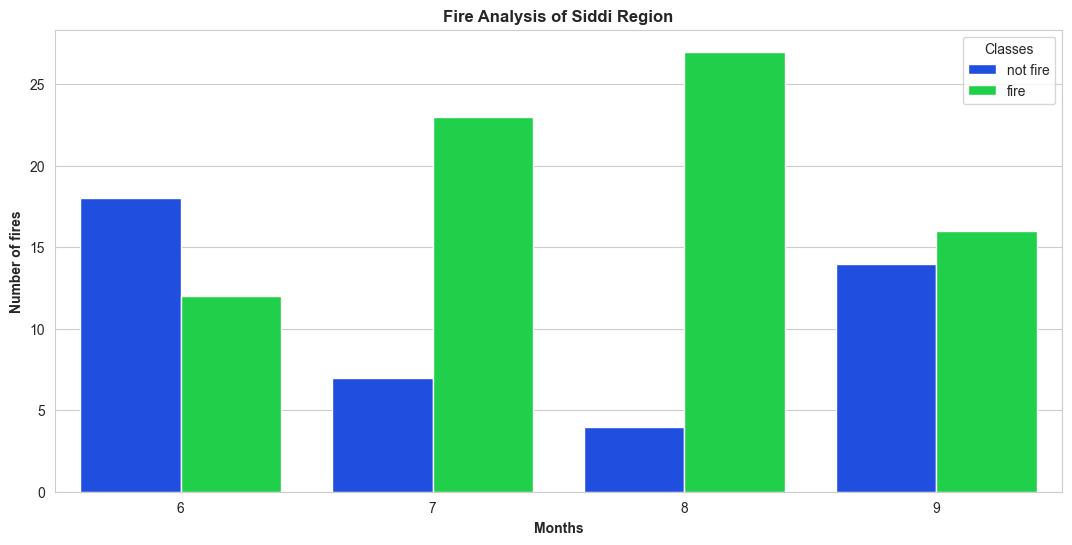

In [398]:
df_temp=df_day_month_inc.loc[df_day_month_inc['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data = df_temp)
plt.ylabel("Number of fires", weight='bold')
plt.xlabel("Months",weight="bold")
plt.title('Fire Analysis of Siddi Region',weight="bold")

Text(0.5, 1.0, 'Fire Analysis of Bajeria Region')

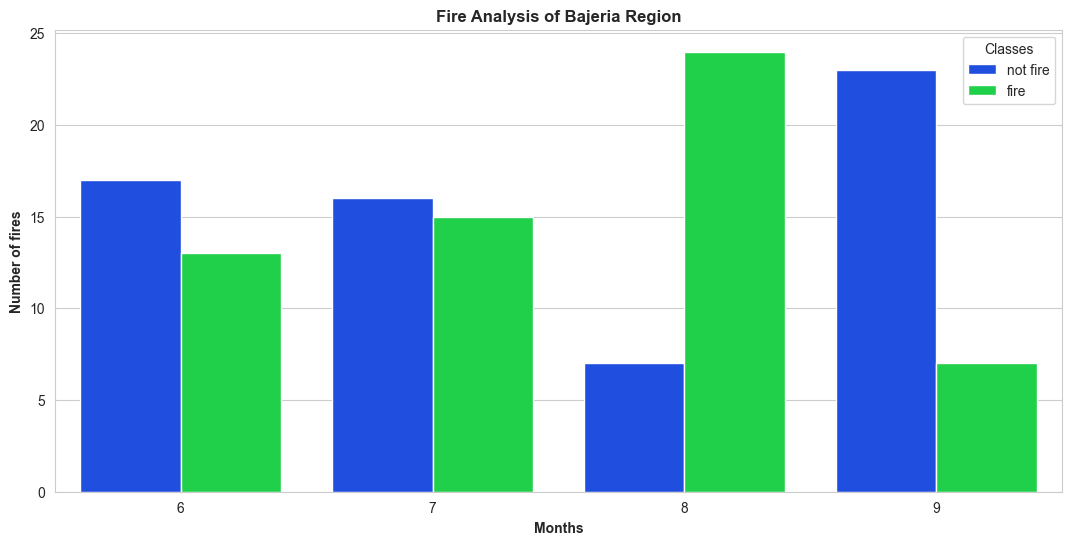

In [399]:
df_temp=df_day_month_inc.loc[df_day_month_inc['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data = df_temp)
plt.ylabel("Number of fires", weight='bold')
plt.xlabel("Months",weight="bold")
plt.title('Fire Analysis of Bajeria Region',weight="bold")

In [400]:
# fire was higher in all 6,7,8 th months

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  Region       243 non-null    int32  
dtypes: float64(7), int32(5)
memory usage: 18.2 KB


In [402]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [403]:
## independant and dependant feature
X= df.drop('FWI',axis=1)
y=df['FWI']

X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [404]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [405]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [406]:
X_train.shape

(170, 11)

Text(0.5, 1.0, 'Core Relation')

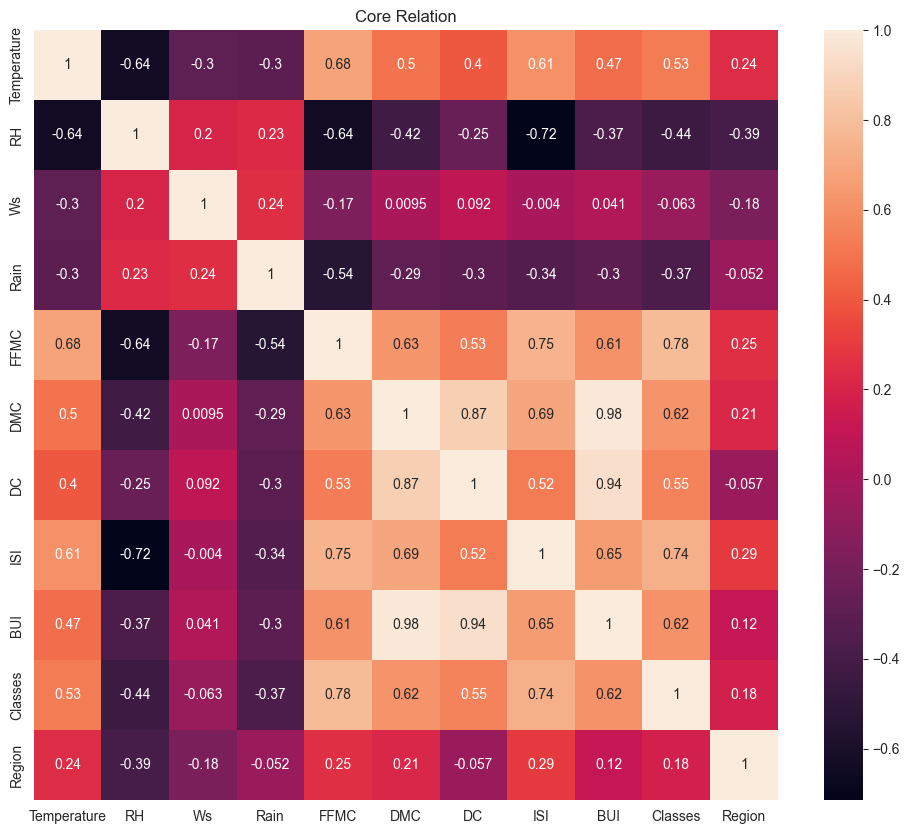

In [407]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)
plt.title("Core Relation")

In [408]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(dataset.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:  #abs help to see neg and pos correlation
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [409]:
corr_features = correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [410]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape, X_test.shape

((170, 9), (73, 9))

In [411]:
## Scaleing

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.26131696, -0.86261203, -0.59170487, ...,  0.57277215,
         0.90992142, -1.        ],
       [-1.64645715,  1.16565969,  0.17323679, ..., -1.03570698,
        -1.098996  , -1.        ],
       [-0.0112222 , -0.5921758 , -1.73911734, ..., -0.82590535,
        -1.098996  , -1.        ],
       ...,
       [-1.91899631,  0.89522346,  0.55570761, ..., -1.05901827,
        -1.098996  , -1.        ],
       [ 0.53385612, -0.25413052,  0.17323679, ...,  0.61939473,
         0.90992142,  1.        ],
       [-0.55630052,  0.96283252,  2.08559091, ..., -0.84921665,
        -1.098996  , -1.        ]])

<Axes: title={'center': 'Xtrain scaled'}>

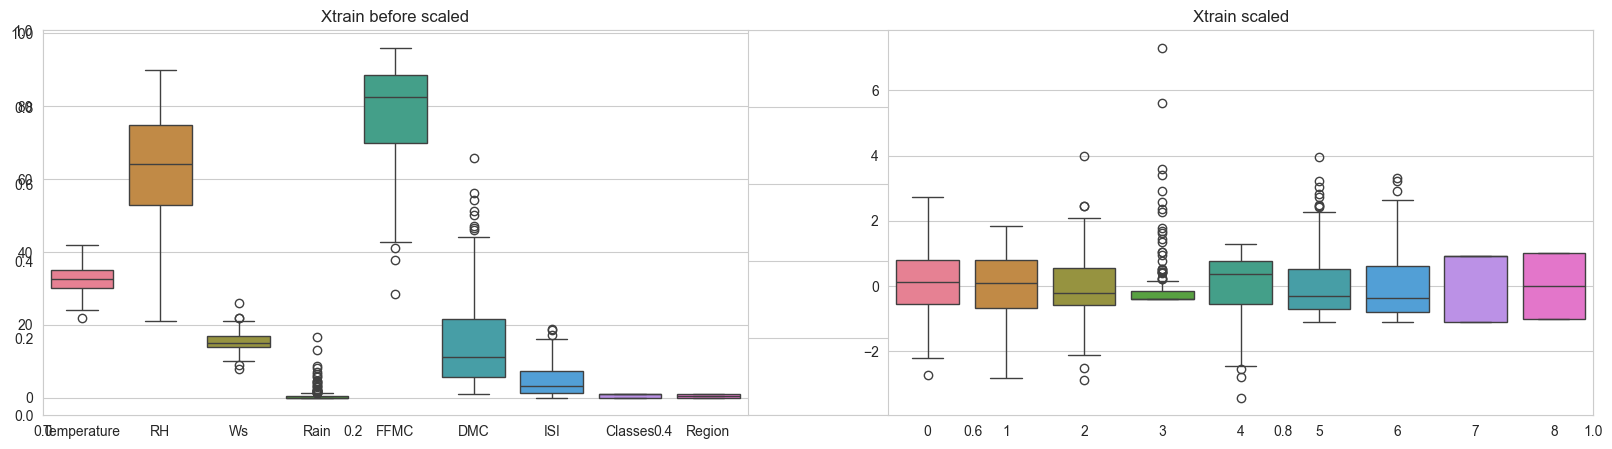

In [412]:
## box plot to find outliers

plt.subplots(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("Xtrain before scaled")
sns.boxplot(X_train)

plt.subplot(1,2,2)
plt.title("Xtrain scaled")
sns.boxplot(X_train_scaled)

MAE :  0.5648036371485077 	score :  0.9847206874554418


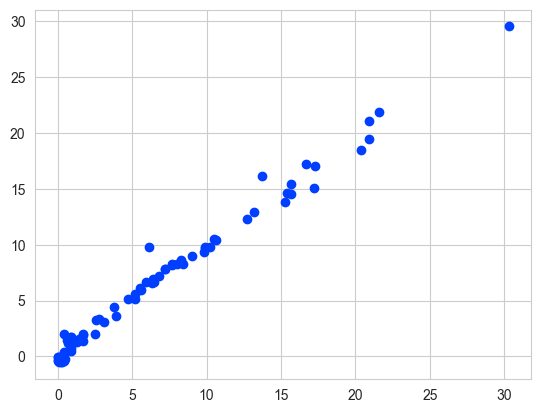

In [413]:
## Linear reg model
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)

y_pred = regressor.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("MAE : ", mae, "\tscore : ",score)

plt.scatter(y_test,y_pred)

## Ridge and Lasso

In [414]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

MAE :  1.1203368882393199 	score :  0.9511364350928344


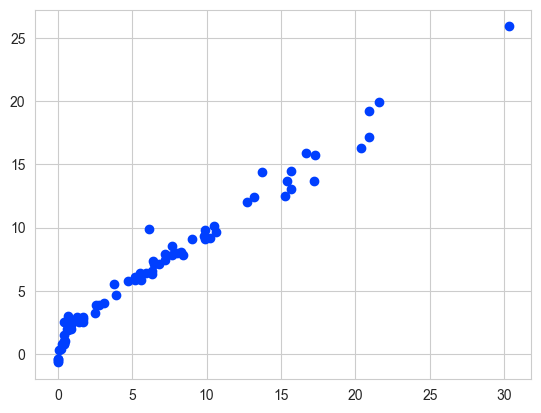

In [415]:
## Lasso, alpha L1 term
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)

pred_lasso = lasso.predict(X_test_scaled)

mae_lasso = mean_absolute_error(y_test,pred_lasso)
score_lasso = r2_score(y_test,pred_lasso)
print("MAE : ", mae_lasso, "\tscore : ",score_lasso)

plt.scatter(y_test,pred_lasso)

MAE :  0.5844876727578059 
 score :  0.9841610358272455


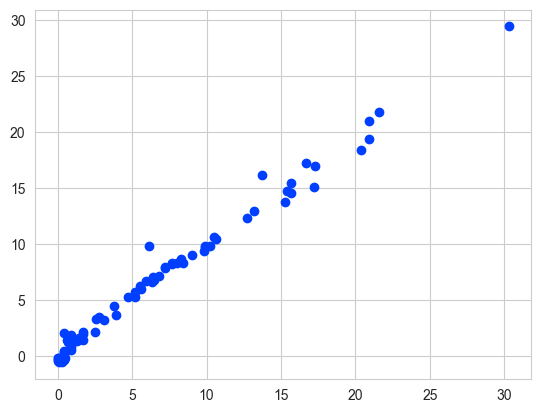

In [416]:
## Ridge Regression

ridge_reg = Ridge()

ridge_reg.fit(X_train_scaled,y_train)

y_pred_ridge = ridge_reg.predict(X_test_scaled)

mae_ridge = mean_absolute_error(y_test,y_pred_ridge)
score_ridge = r2_score(y_test,y_pred_ridge)

print("MAE : ",mae_ridge,"\n score : ",score_ridge)

plt.scatter(y_test,y_pred_ridge)

MAE :  1.855468747971755 
 score :  0.8804077479376988


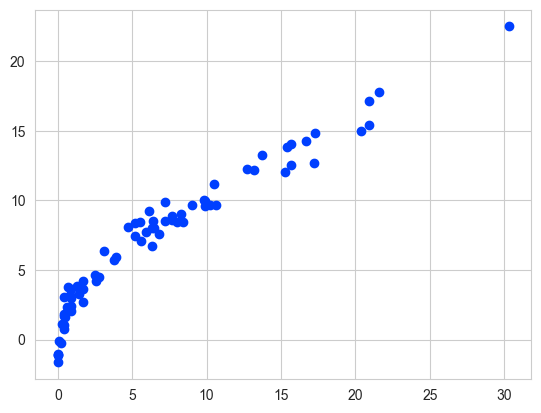

In [417]:
## Elastic net Regression

elastic_reg = ElasticNet()

elastic_reg.fit(X_train_scaled,y_train)

y_pred_elastic = elastic_reg.predict(X_test_scaled)

mae_elastic = mean_absolute_error(y_test,y_pred_elastic)
score_elastic = r2_score(y_test,y_pred_elastic)

print("MAE : ",mae_elastic,"\n score : ",score_elastic)

plt.scatter(y_test,y_pred_elastic)

## Cross Validation

dataset is divided to training and testing data then, training data is divide into to train and validation data. Using validation data we perform hyperparameter tuning. See notes 17 and diagram7 in obsidian

In [418]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV

In [419]:
## lasso CV

lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
lassocv.alpha_

0.06177603120682054

In [420]:
lassocv.alphas_

array([7.1027424 , 6.62404134, 6.17760312, 5.76125335, 5.37296415,
       5.01084435, 4.67313021, 4.35817688, 4.06445034, 3.79051999,
       3.53505163, 3.29680098, 3.07460763, 2.86738937, 2.67413692,
       2.49390904, 2.32582792, 2.1690749 , 2.02288651, 1.88655073,
       1.75940353, 1.64082562, 1.53023946, 1.42710644, 1.33092425,
       1.24122441, 1.15757004, 1.07955369, 1.00679538, 0.93894074,
       0.87565928, 0.81664278, 0.76160379, 0.71027424, 0.66240413,
       0.61776031, 0.57612533, 0.53729642, 0.50108444, 0.46731302,
       0.43581769, 0.40644503, 0.379052  , 0.35350516, 0.3296801 ,
       0.30746076, 0.28673894, 0.26741369, 0.2493909 , 0.23258279,
       0.21690749, 0.20228865, 0.18865507, 0.17594035, 0.16408256,
       0.15302395, 0.14271064, 0.13309242, 0.12412244, 0.115757  ,
       0.10795537, 0.10067954, 0.09389407, 0.08756593, 0.08166428,
       0.07616038, 0.07102742, 0.06624041, 0.06177603, 0.05761253,
       0.05372964, 0.05010844, 0.0467313 , 0.04358177, 0.04064

In [421]:
lassocv.mse_path_

array([[50.65386968, 76.54197718, 42.60540011, 85.19903601, 37.22447771],
       [44.75111814, 74.82132255, 38.341692  , 85.19903601, 33.05643554],
       [39.36934038, 67.35349762, 32.91718118, 77.16947646, 28.98441557],
       [34.66809152, 60.76849885, 28.30179163, 70.00628728, 25.07891899],
       [30.56005987, 54.39656706, 24.38332378, 63.69553448, 21.70030699],
       [26.96916466, 47.86216351, 21.06462063, 58.13161794, 18.77862509],
       [23.82945553, 42.15575307, 18.26138649, 53.22232605, 16.25301222],
       [21.08318369, 37.17090521, 15.90095328, 46.89293347, 14.07124316],
       [18.68014904, 32.81473426, 13.92043855, 41.32635877, 12.18732916],
       [16.57661964, 29.00744813, 12.26540003, 36.4658746 , 10.56155236],
       [14.73438066, 25.67846082, 10.88893934, 32.22081976,  9.15943046],
       [13.12047322, 22.76665973,  9.75047302, 28.5122238 ,  7.95103045],
       [11.70583482, 20.21881242,  8.81511714, 25.27132199,  6.9102242 ],
       [10.46524798, 17.98854548,  8.0

MAE :  0.6356015744517419 
 score :  0.9821627684487946


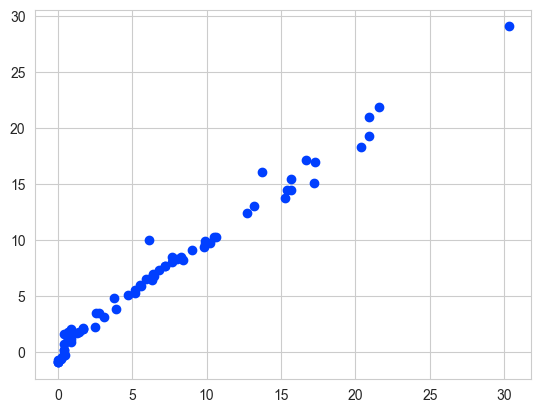

In [422]:
y_pred_lassocv = lassocv.predict(X_test_scaled)

mae_lassocv = mean_absolute_error(y_test,y_pred_lassocv)
score_lassocv = r2_score(y_test,y_pred_lassocv)

print("MAE : ",mae_lassocv,"\n score : ",score_lassocv)

plt.scatter(y_test,y_pred_lassocv)

MAE :  0.7943132619521931 
 score :  0.976223192919533


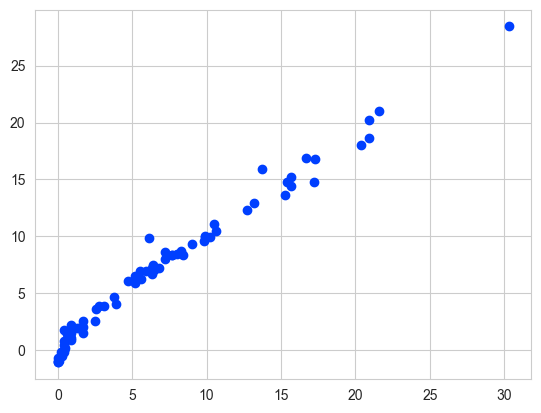

In [423]:
## Ridge CV

ridgecv_reg = RidgeCV(cv=5)

ridgecv_reg.fit(X_train_scaled,y_train)

y_pred_ridgecv = ridgecv_reg.predict(X_test_scaled)

mae_ridgecv = mean_absolute_error(y_test,y_pred_ridgecv)
score_ridgecv = r2_score(y_test,y_pred_ridgecv)

print("MAE : ",mae_ridgecv,"\n score : ",score_ridgecv)

plt.scatter(y_test,y_pred_ridgecv)

MAE :  0.7943132619521931 
 score :  0.976223192919533


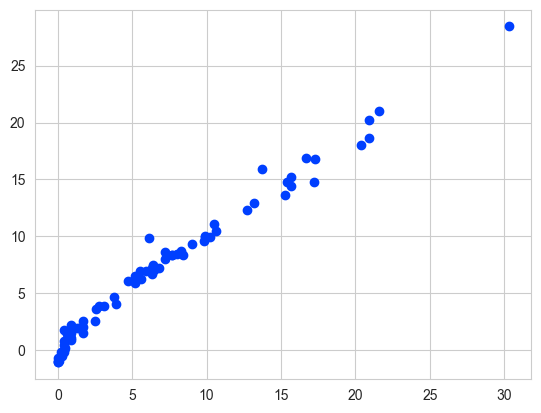

In [424]:
## Elastic CV

ridgecv_reg = RidgeCV(cv=5)

ridgecv_reg.fit(X_train_scaled,y_train)

y_pred_ridgecv = ridgecv_reg.predict(X_test_scaled)

mae_ridgecv = mean_absolute_error(y_test,y_pred_ridgecv)
score_ridgecv = r2_score(y_test,y_pred_ridgecv)

print("MAE : ",mae_ridgecv,"\n score : ",score_ridgecv)

plt.scatter(y_test,y_pred_ridgecv)

MAE :  0.6856401038998683 
 score :  0.9807402447693789


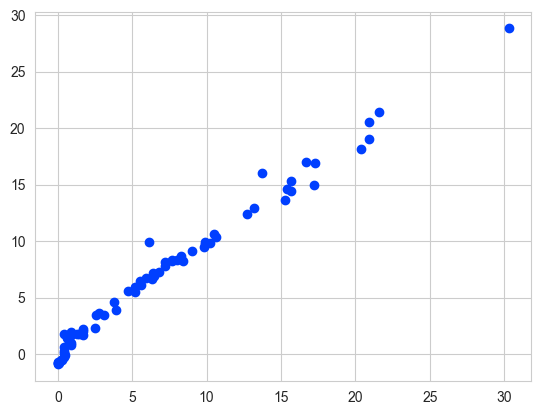

In [425]:
## Elastic net CV Regression

elasticcv_reg = ElasticNetCV(cv=5)

elasticcv_reg.fit(X_train_scaled,y_train)

y_pred_elasticcv = elasticcv_reg.predict(X_test_scaled)

mae_elasticcv = mean_absolute_error(y_test,y_pred_elasticcv)
score_elasticcv = r2_score(y_test,y_pred_elasticcv)

print("MAE : ",mae_elasticcv,"\n score : ",score_elasticcv)

plt.scatter(y_test,y_pred_elasticcv)

In [426]:
elasticcv_reg.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [427]:
elastic_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [429]:
## Saving pickle

import pickle

pickle.dump(regressor,open('../pickle_files/12_proj01_algerian/linear_regressor.pkl','wb'))
pickle.dump(ridge_reg,open('../pickle_files/12_proj01_algerian/ridge_regressor.pkl','wb'))
pickle.dump(ridgecv_reg,open('../pickle_files/12_proj01_algerian/ridgeCV_regressor.pkl','wb'))
pickle.dump(lasso,open('../pickle_files/12_proj01_algerian/lasso_regressor.pkl','wb'))
pickle.dump(lassocv,open('../pickle_files/12_proj01_algerian/lassoCV_regressor.pkl','wb'))
pickle.dump(elastic_reg,open('../pickle_files/12_proj01_algerian/elasticnet_regressor.pkl','wb'))
pickle.dump(elasticcv_reg,open('../pickle_files/12_proj01_algerian/elasticnetCV_regressor.pkl','wb'))
pickle.dump(elasticcv_reg,open('../pickle_files/12_proj01_algerian/elasticnetCV_regressor.pkl','wb'))

pickle.dump(scaler,open('../pickle_files/12_proj01_algerian/standscaler.pkl','wb'))